# Predicting Survival on the Titanic
**Kaggle Dataset**

We have been given 2 datasets - Train and Test. We need to train the model so that it can predict based on various parameters that a passenger would survive or not.

**Collecting the dataset**

In [360]:
import pandas as pd

train = pd.read_csv(r'C:\Users\KIIT\Desktop\train.csv')
test = pd.read_csv(r'C:\Users\KIIT\Desktop\test.csv')

In [361]:
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Data Dictionary**
(as per Kaggle)


   1. Survived: 0 = No, 1 = Yes
   2. pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
   3. sibsp: # of siblings / spouses aboard the Titanic
   4. parch: # of parents / children aboard the Titanic
   5. ticket: Ticket number
   6. cabin: Cabin number
   7. embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton


In [362]:
print (train.shape)

(891, 12)


In [363]:
print (test.shape)

(418, 11)


We see that we have 891 rows and 12 columns in the train dataset and 418 rows and 11 columns in the test dataset

**Now we check the null values**

In [364]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 So in train dataset ,we have Age,Cabin and Embarked which have missing data

In [365]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In the test dataset , we have Age,Fare and Cabin which have some missing values

**Data Visualization to compare certain parameters**

In [366]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar')

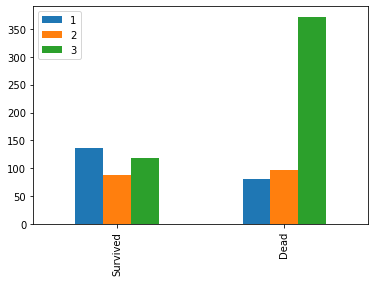

In [367]:
  bar_chart('Pclass')

**Conclusion**: 

1st class is more likely survived as compared to other classes

            

 3rd class is most likely to have highest casuality 

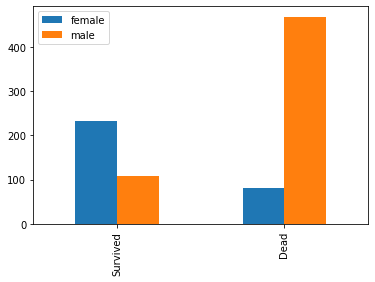

In [368]:
  bar_chart('Sex')

**Conclusion**: Women survived more as compared to men

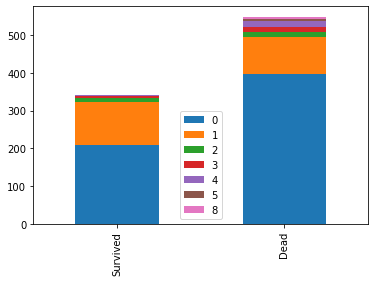

In [369]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked='True')
    # used stacked bar graph for clearer picture
    
bar_chart('SibSp')

**Conclusion**: People with more than 2 siblings/spouse were more likely to survive

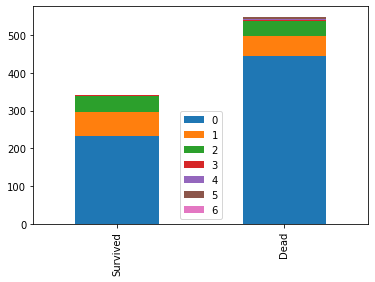

In [370]:
bar_chart('Parch')

**Conclusion**:People who aboarded with more than 2 parents or children more likely survived

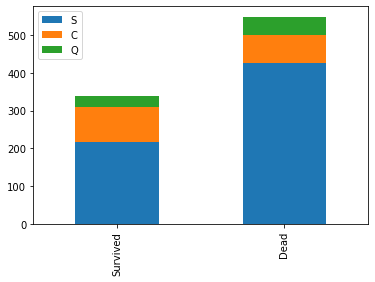

In [371]:
bar_chart('Embarked')

**Conclusion**: The likeliness of survival in ascending order: S<Q<C

**Converting text data to numericals**

In [372]:
#for Sex data
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

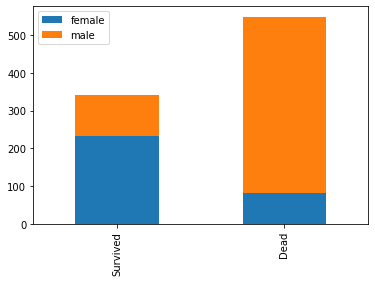

In [373]:
bar_chart('Sex')

In [374]:
#for the Name data

# combining train and test dataset for further use during mapping
train_test_data = [train, test]

#extracting the titles before name
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [375]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Mme           1
Lady          1
Ms            1
Don           1
Capt          1
Countess      1
Sir           1
Jonkheer      1
Name: Title, dtype: int64

In [376]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

**We need to assign numercial values to the titles before name**

Mr : 0
Miss : 1
Mrs: 2
Master:3
Others: 4

In [377]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"Countess": 4,
                 "Ms": 4, "Lady": 4, "Jonkheer": 4, "Don": 4, "Dona" : 4, "Mme": 4,"Capt": 4,"Sir": 4 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [378]:
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


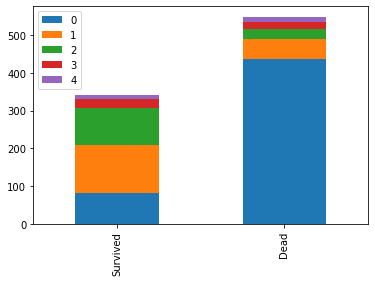

In [379]:
bar_chart('Title')

Now we can delete the"Name" column

In [380]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [381]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,2


In [382]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


**Filling the NaN values**

In [383]:
# Age missing values
train.Age = train.Age.fillna(train.Age.mean())
test.Age = test.Age.fillna(test.Age.mean())

In [384]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [385]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [386]:
#Embarked missing values
# Since most people were from S class will fill missing values with S
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')


**Coverting "Embark" test data to numerical**

In [387]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [388]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,0,0


In [389]:
# fill missing Fare with median fare for each Pclass

train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [390]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,2,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,0,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,2,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,0,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,0,2


**Drop unnecessary features**

In [391]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,0,0


In [392]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [393]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,2,0
1,893,3,female,47.0,1,0,363272,7.0000,0,2
2,894,2,male,62.0,0,0,240276,9.6875,2,0
3,895,3,male,27.0,0,0,315154,8.6625,0,0
4,896,3,female,22.0,1,1,3101298,12.2875,0,2


In [394]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [395]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,2,0
1,893,3,1,47.0,1,0,363272,7.0000,0,2
2,894,2,0,62.0,0,0,240276,9.6875,2,0
3,895,3,0,27.0,0,0,315154,8.6625,0,0
4,896,3,1,22.0,1,1,3101298,12.2875,0,2


In [396]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [397]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title
0,892,3,0,34.5,7.8292,2,0
1,893,3,1,47.0,7.0000,0,2
2,894,2,0,62.0,9.6875,2,0
3,895,3,0,27.0,8.6625,0,0
4,896,3,1,22.0,12.2875,0,2


In [398]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title
0,0,3,0,22.0,7.2500,0,0
1,1,1,1,38.0,71.2833,1,2
2,1,3,1,26.0,7.9250,0,1
3,1,1,1,35.0,53.1000,0,2
4,0,3,0,35.0,8.0500,0,0


In [399]:
#X
train_data = train.drop('Survived', axis=1)
#Y
target = train['Survived']

train_data.shape, target.shape

((891, 6), (891,))

In [413]:
# Importing Classifier Modules

#using Naive Bayes
from sklearn.naive_bayes import GaussianNB


import numpy as np

from sklearn.model_selection import KFold
#Splits it into K folds, trains on K-1 and then tests on the left-out.

from sklearn.model_selection import cross_val_score
# computes the scores based on the testing set for each iteration of cross-validation

k_fold = KFold(n_splits=30, shuffle=True, random_state=0)

model = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.8        0.66666667 0.83333333 0.86666667 0.8
 0.73333333 0.8        0.83333333 0.86666667 0.83333333 0.73333333
 0.8        0.83333333 0.83333333 0.86666667 0.83333333 0.73333333
 0.83333333 0.86666667 0.8        0.75862069 0.89655172 0.82758621
 0.72413793 0.86206897 0.82758621 0.75862069 0.79310345 0.89655172]


Highest we could get as the score was 89.6

In [414]:
# Naive Bayes Final score
round(np.mean(score)*100, 2)

81.04

Since we get only 77.36 accuracy, we can try other Classifiers

In [415]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [416]:
model= DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.86666667 0.76666667 0.73333333 0.93333333 0.86666667 0.76666667
 0.8        0.7        0.8        0.8        0.86666667 0.8
 0.8        0.86666667 0.86666667 0.9        0.86666667 0.7
 0.86666667 0.8        0.76666667 0.75862069 0.82758621 0.79310345
 0.68965517 0.86206897 0.79310345 0.68965517 0.79310345 0.86206897]


In [417]:
# decision tree final score
round(np.mean(score)*100, 2)

80.67

In [418]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [419]:
model= KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)



[0.83333333 0.8        0.73333333 0.93333333 0.86666667 0.76666667
 0.8        0.83333333 0.83333333 0.83333333 0.8        0.73333333
 0.83333333 0.83333333 0.83333333 0.86666667 0.86666667 0.7
 0.86666667 0.86666667 0.73333333 0.72413793 0.79310345 0.82758621
 0.68965517 0.82758621 0.82758621 0.79310345 0.82758621 0.86206897]


In [420]:
# KNeighborsClassifier final Score
round(np.mean(score)*100, 2)

81.13

In [421]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)


[0.83333333 0.76666667 0.8        0.9        0.86666667 0.8
 0.8        0.86666667 0.8        0.83333333 0.83333333 0.76666667
 0.8        0.8        0.9        0.9        0.9        0.7
 0.86666667 0.83333333 0.76666667 0.75862069 0.82758621 0.79310345
 0.79310345 0.86206897 0.79310345 0.75862069 0.79310345 0.89655172]


In [422]:
# Random Forest Score
round(np.mean(score)*100, 2)

82.03

In [423]:
#Using Support Vector Machine
from sklearn.svm import SVC
model = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.86666667 0.76666667 0.7        0.86666667 0.8        0.8
 0.8        0.8        0.8        0.73333333 0.76666667 0.83333333
 0.9        0.83333333 0.86666667 0.86666667 0.9        0.66666667
 0.86666667 0.83333333 0.83333333 0.79310345 0.79310345 0.79310345
 0.72413793 0.82758621 0.86206897 0.86206897 0.79310345 0.89655172]


In [424]:
round(np.mean(score)*100,2)

81.48

**The highest accuracy we get with Random Forest Classifier**

**FINAL TEST**

In [425]:
model = RandomForestClassifier(n_estimators=13)

model.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()

prediction =model.predict(test_data)

submit = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submit.to_csv('Final_submission.csv', index=False)

submit = pd.read_csv('Final_submission.csv')
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
